In [ ]:
!pip install gcastle==1.0.3
!pip install networkx==2.8

In [2]:
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC

In [3]:
# Erdos-Renyiモデルを使用してランダムなDAGを生成。ここでは4個のノードと4個のエッジを持つDAGを生成。エッジの重みは0.5から2.0の範囲でランダムに設定。
weighted_random_dag = DAG.erdos_renyi(n_nodes=4, n_edges=4,weight_range=(0.5, 2.0), seed=1)

# 上記で生成したDAGに基づいてデータを生成。ここでは、n=500のデータを生成。データ生成の方法は線形で、誤差項はガウス分布に従う。
dataset = IIDSimulation(W=weighted_random_dag, n=500, method='linear', sem_type='gauss')

# 生成したデータから真の因果構造とデータを取得
true_dag, X = dataset.B, dataset.X

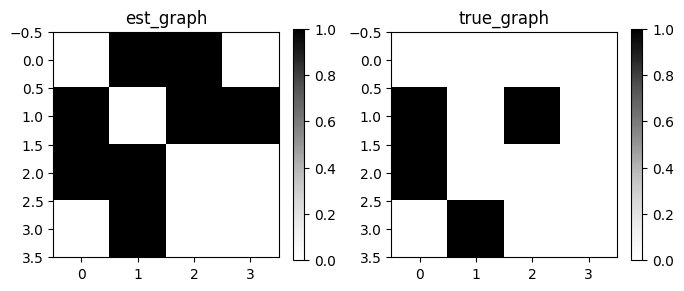

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 4, 'precision': 0.5, 'recall': 1.0, 'F1': 0.6667, 'gscore': 0.0}


In [4]:
#PCアルゴリズム

# 構造学習(PC)
g = PC() # PCアルゴリズムのインスタンスを生成
g.learn(X) # PCアルゴリズムを使用してデータから因果構造を学習

# 予測・精度検証
GraphDAG(g.causal_matrix, true_dag, 'result')
mt = MetricsDAG(g.causal_matrix, true_dag) #学習した因果構造と真の因果構造との間の各種精度指標を計算
print(mt.metrics)

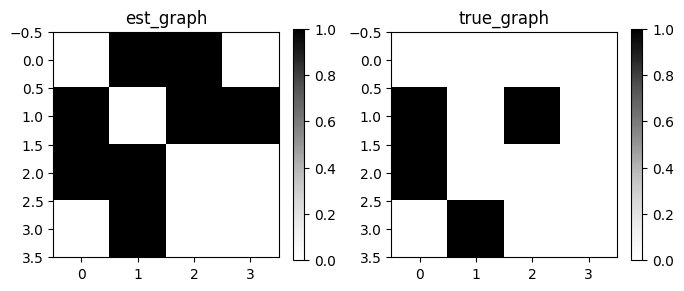

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 4, 'precision': 0.5, 'recall': 1.0, 'F1': 0.6667, 'gscore': 0.0}


In [5]:
#GESアルゴリズム

# ライブラリのインポート
from castle.algorithms.ges.ges import GES

# 構造学習(GES)
g = GES(criterion='bic')
g.learn(X)

# 予測・精度検証
GraphDAG(g.causal_matrix, true_dag)
m1 = MetricsDAG(g.causal_matrix, true_dag)
print(m1.metrics)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


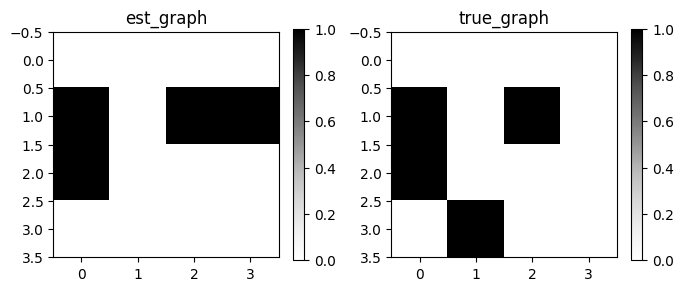

{'fdr': 0.25, 'tpr': 0.75, 'fpr': 0.5, 'shd': 1, 'nnz': 4, 'precision': 0.75, 'recall': 0.75, 'F1': 0.75, 'gscore': 0.5}


In [6]:
#ICALiNGAM

# ライブラリのインポート
from castle.algorithms import ICALiNGAM

# 構造学習(ICALiNGAM)
g = ICALiNGAM(random_state=2)
g.learn(X)

# 予測・精度検証
GraphDAG(g.causal_matrix, true_dag)
met = MetricsDAG(g.causal_matrix, true_dag)
print(met.metrics)

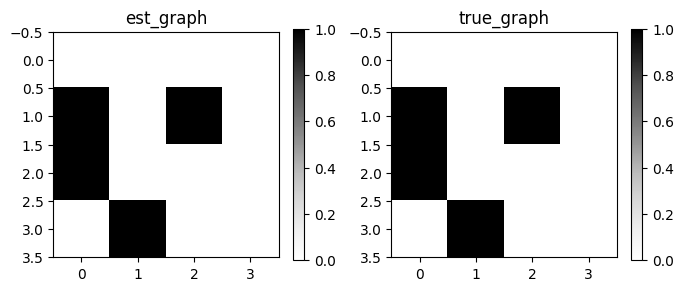

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 4, 'precision': 1.0, 'recall': 1.0, 'F1': 1.0, 'gscore': 1.0}


In [7]:
# GOLEM

# ライブラリのインポート
from castle.algorithms import GOLEM

# 構造学習(GOLEM)
g = GOLEM(num_iter=1e4) # num_iter はアルゴリズムの反復回数を指定する。ここでは 10,000 回に指定
g.learn(X)

# 予測・精度検証
GraphDAG(g.causal_matrix, true_dag)
met = MetricsDAG(g.causal_matrix, true_dag)
print(met.metrics)